In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pyearth import Earth

In [2]:
m = 10000
n = 10
X = 80 * np.random.uniform(size=(m, n)) - 40
y1 = 120 * np.abs(np.sin((X[:, 6]) / 6) - 1.0) + 15 * np.random.normal(size=m)
y2 = 120 * np.abs(np.sin((X[:, 5]) / 6) - 1.0) + 15 * np.random.normal(size=m)

y1 = (y1 - y1.mean()) / y1.std()
y2 = (y2 - y2.mean()) / y2.std()
y_mix = np.concatenate((y1[:, np.newaxis], y2[:, np.newaxis]), axis=1)

Earth Model
---------------------------------------------------------------------------------
Basis Function                             Pruned  Coefficient 0  Coefficient 1  
---------------------------------------------------------------------------------
(Intercept)                                No      -1.67242       0.18573        
h(x6-12.3855)                              No      0.345317       -0.00326959    
h(12.3855-x6)                              No      0.00166315     0.000543343    
h(x6+28.946)*h(12.3855-x6)                 No      0.00780705     -0.00010476    
h(-28.946-x6)*h(12.3855-x6)                No      0.00360176     -0.00016892    
h(x6-14.8765)*h(x6-12.3855)                No      -0.0120492     6.18798e-05    
h(14.8765-x6)*h(x6-12.3855)                No      0.142252       -0.015236      
h(x6+9.68192)*h(x6+28.946)*h(12.3855-x6)   No      -0.000334849   4.2884e-06     
h(-9.68192-x6)*h(x6+28.946)*h(12.3855-x6)  No      -0.000296671   5.67639e-06    
h(x5

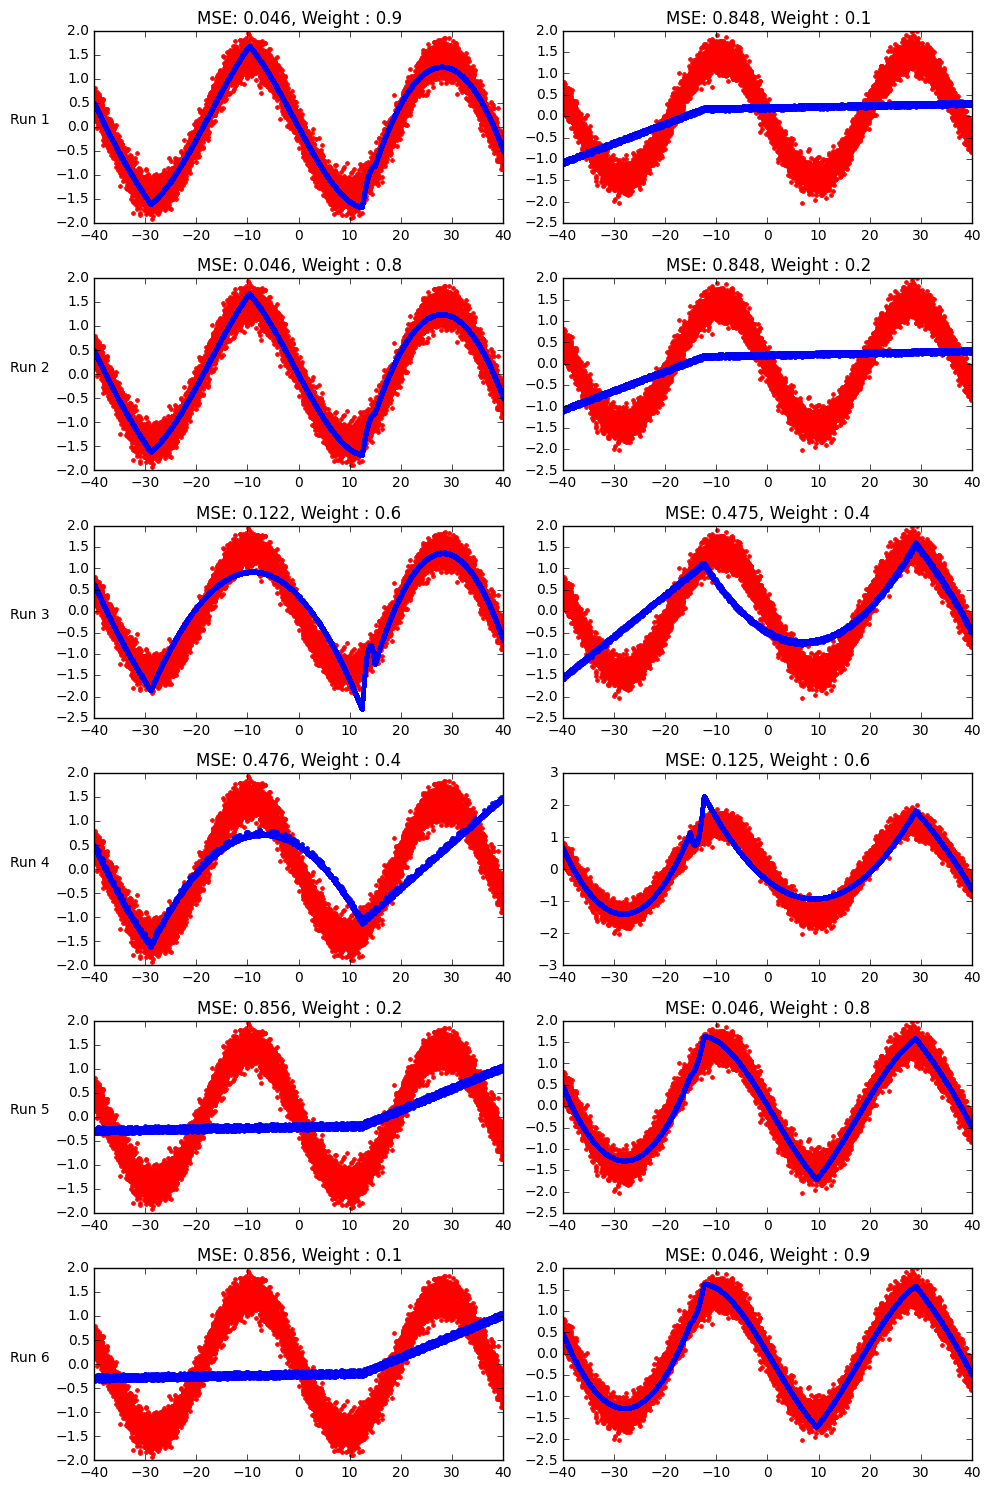

In [3]:
alphas = [0.9, 0.8, 0.6, 0.4, 0.2, 0.1]
n_plots = len(alphas)
k = 1
fig = plt.figure(figsize=(10, 15))
for i, alpha in enumerate(alphas):
    # Fit an Earth model
    model = Earth(max_degree=5,
                  minspan_alpha=.05,
                  endspan_alpha=.05,
                  max_terms=10,
                  check_every=1,
                  thresh=0.)
    output_weight = np.array([alpha, 1 - alpha])
    model.fit(X, y_mix, output_weight=output_weight)
    print(model.summary())

    # Plot the model
    y_hat = model.predict(X)

    mse = ((y_hat - y_mix) ** 2).mean(axis=0)
    ax = plt.subplot(n_plots, 2, k)
    ax.set_ylabel("Run {0}".format(i + 1), rotation=0, labelpad=20)
    plt.plot(X[:, 6], y_mix[:, 0], 'r.')
    plt.plot(X[:, 6], model.predict(X)[:, 0], 'b.')
    plt.title("MSE: {0:.3f}, Weight : {1:.1f}".format(mse[0], alpha))
    plt.subplot(n_plots, 2, k + 1)
    plt.plot(X[:, 5], y_mix[:, 1], 'r.')
    plt.plot(X[:, 5], model.predict(X)[:, 1], 'b.')
    plt.title("MSE: {0:.3f}, Weight : {1:.1f}".format(mse[1], 1 - alpha))
    k += 2
plt.tight_layout()